<a href="https://colab.research.google.com/github/Jishnu2608/Weather-Analysis/blob/main/Weather_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving IndianWeatherRepository.csv to IndianWeatherRepository.csv


In [ ]:
pip install plotly_express

In [ ]:
import pandas as pd #library for data manipulation and analysis
import numpy as np  #lib for numerical computations. Arrays and matrices
import matplotlib.pyplot as plt #lib for data visualization. Create plots and graphs
import seaborn as sns #lib for data visualization. Provides high-level interface for informative statistical graphs
import plotly_express as px #lib for high-level interface for creating interactive plots using Plotly

In [ ]:
weather_df = pd.read_csv("IndianWeatherRepository.csv")
weather_df.head()

,country,location_name,region,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,India,Ashoknagar,Madhya Pradesh,24.57,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45,27.5,81.5,...,12.6,18.5,1,2,05:59 AM,06:41 PM,05:42 PM,03:38 AM,Waxing Gibbous,93
1,India,Raisen,Madhya Pradesh,23.33,77.80,Asia/Kolkata,1693286100,2023-08-29 10:45,27.5,81.5,...,10.7,14.2,1,1,06:00 AM,06:40 PM,05:39 PM,03:41 AM,Waxing Gibbous,93
2,India,Chhindwara,Madhya Pradesh,22.07,78.93,Asia/Kolkata,1693286100,2023-08-29 10:45,26.3,79.3,...,16.8,20.7,2,2,05:56 AM,06:34 PM,05:32 PM,03:39 AM,Waxing Gibbous,93
3,India,Betul,Madhya Pradesh,21.86,77.93,Asia/Kolkata,1693286100,2023-08-29 10:45,25.6,78.1,...,4.9,6.6,1,1,06:00 AM,06:38 PM,05:36 PM,03:43 AM,Waxing Gibbous,93
4,India,Hoshangabad,Madhya Pradesh,22.75,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45,27.2,81.0,...,11.4,14.8,1,1,06:01 AM,06:39 PM,05:38 PM,03:42 AM,Waxing Gibbous,93


In [ ]:
#column names
weather_df.columns


Index(['country', 'location_name', 'region', 'latitude', 'longitude',
       'timezone', 'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')

In [ ]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9840 entries, 0 to 9839
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       9840 non-null   object 
 1   location_name                 9840 non-null   object 
 2   region                        9840 non-null   object 
 3   latitude                      9840 non-null   float64
 4   longitude                     9840 non-null   float64
 5   timezone                      9840 non-null   object 
 6   last_updated_epoch            9840 non-null   int64  
 7   last_updated                  9840 non-null   object 
 8   temperature_celsius           9840 non-null   float64
 9   temperature_fahrenheit        9840 non-null   float64
 10  condition_text                9840 non-null   object 
 11  wind_mph                      9840 non-null   float64
 12  wind_kph                      9840 non-null   float64
 13  win

Wind speed distribution

In [54]:
fig = px.histogram(weather_df, x='wind_mph', title = "Wind Speed Distribution",
                   labels = {"wind_mph" : "Wind Speed (miles per hour)",
                             "count" : "Frequency"})
fig.update_layout(width=1200, height=600)
fig.show()

Weather Condition Overview

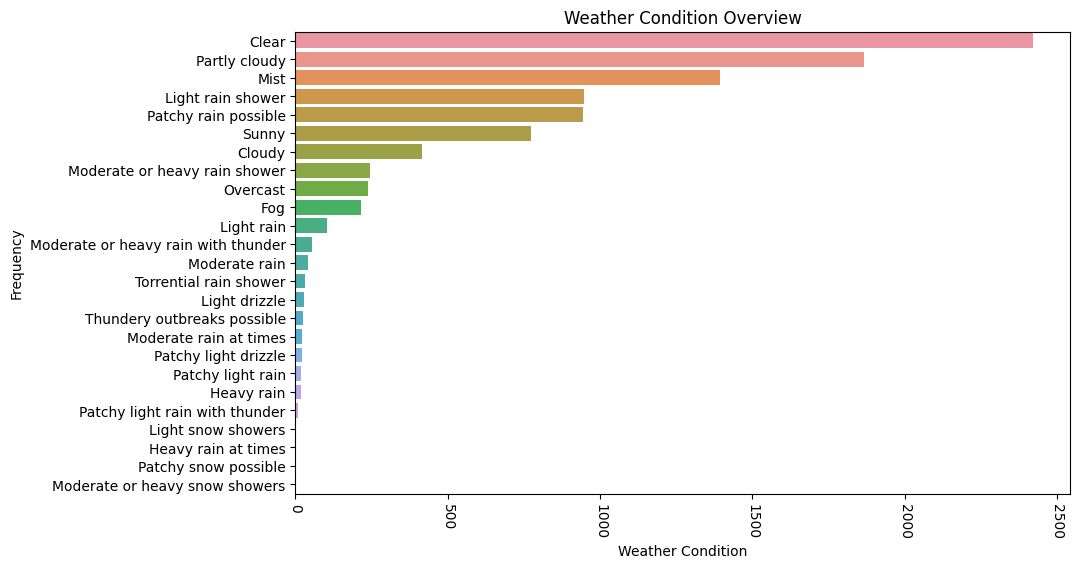

In [18]:
condition_counts = weather_df['condition_text'].value_counts()

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=condition_counts.values, y=condition_counts.index)
plt.title('Weather Condition Overview')
plt.xlabel('Weather Condition')
plt.ylabel('Frequency')
plt.xticks(rotation=270)
plt.show()

Pressure and cloud cover relationship

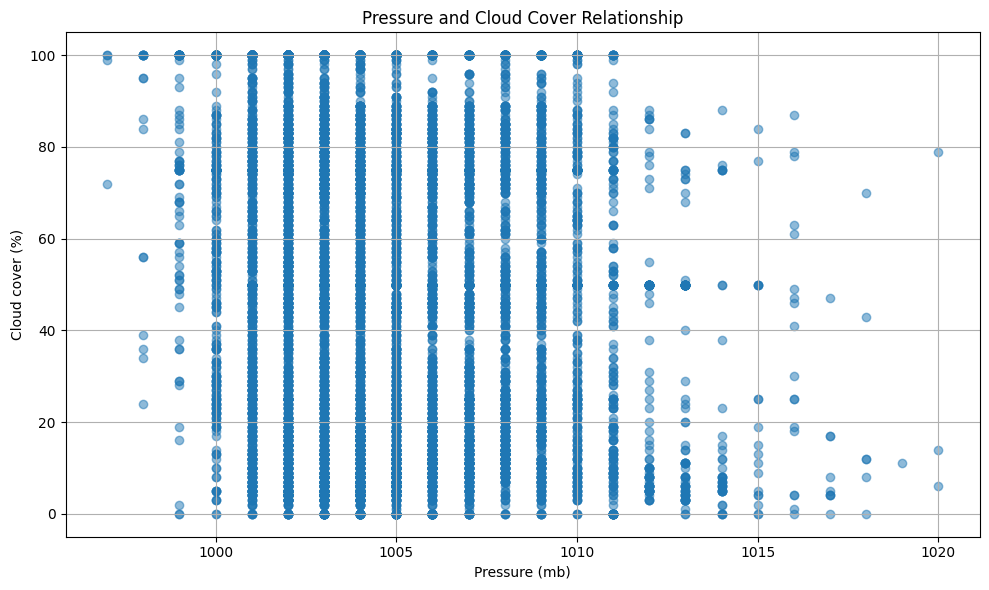

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(weather_df['pressure_mb'], weather_df['cloud'], alpha=0.5)
plt.title("Pressure and Cloud Cover Relationship")
plt.xlabel("Pressure (mb)")
plt.ylabel("Cloud cover (%)")
plt.grid()
plt.tight_layout()
plt.show()

Moon Phase Distribution

In [53]:
moon_phase_counts = weather_df['moon_phase'].value_counts()

fig = px.pie(moon_phase_counts, names=moon_phase_counts.index,
             values = moon_phase_counts.values, title="Moon Phase Distribution",
             template = "plotly_white")
fig.update_layout(width=1000, height=600)
fig.show()

Geographical Wind direction

In [51]:
import plotly.graph_objects as go

wind_direction_counts = weather_df['wind_direction'].value_counts()

fig = go.Figure(data = go.Barpolar(r = wind_direction_counts.values,
                                   theta = wind_direction_counts.index,
                                   marker_color = "mediumseagreen", width=[15]
                                   * len(wind_direction_counts)))
fig.update_layout(title="Geographical Wind Direction", showlegend = False,
                  polar = dict(radialaxis = dict(showticklabels = False, ticks=''),
                               angularaxis = dict(showticklabels=True, ticks=''),))
fig.update_layout(width=1000, height=600)
fig.show()

Weather Condition Distribution

In [50]:
condition_counts = weather_df['condition_text'].value_counts()

fig = px.pie(condition_counts, names=condition_counts.index, values=condition_counts.values,
             title='Condition Distribution', template='plotly_white')
fig.update_layout(width=1000, height=600)

fig.show()

Temperature and Humidity Correlation

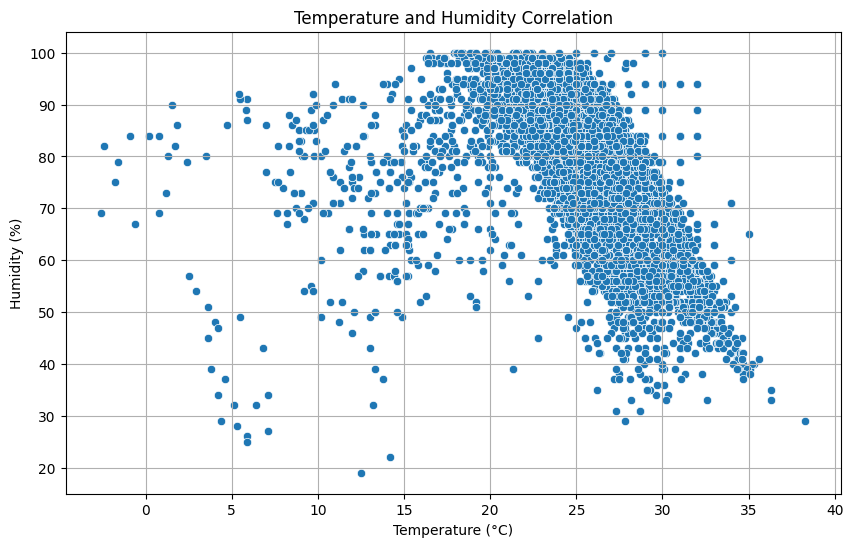

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = weather_df, x = 'temperature_celsius', y = 'humidity')
plt.title("Temperature and Humidity Correlation")
plt.xlabel("Temperature (°C)")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

Wind Speed and Wind Gust Relationship

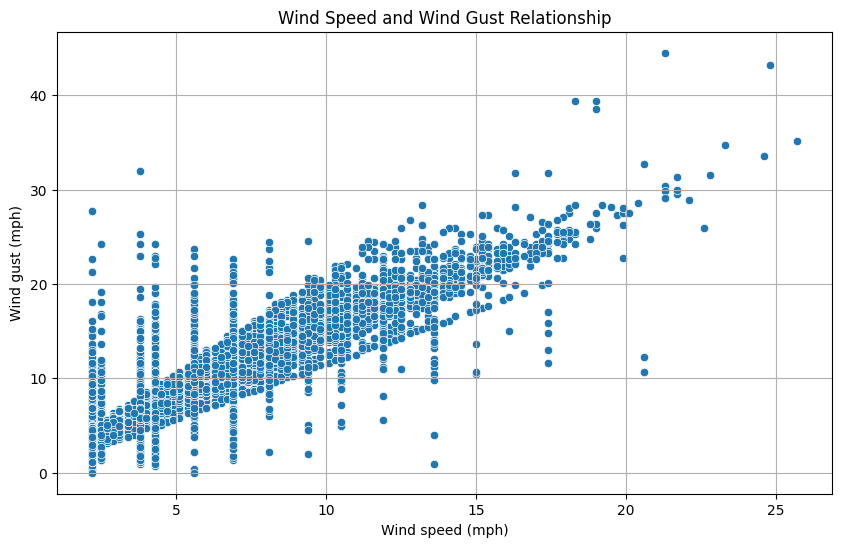

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = weather_df, x = 'wind_mph', y = 'gust_mph')
plt.title("Wind Speed and Wind Gust Relationship")
plt.xlabel("Wind speed (mph)")
plt.ylabel("Wind gust (mph)")
plt.grid()
plt.show()

Pressure and Humidity Relationship

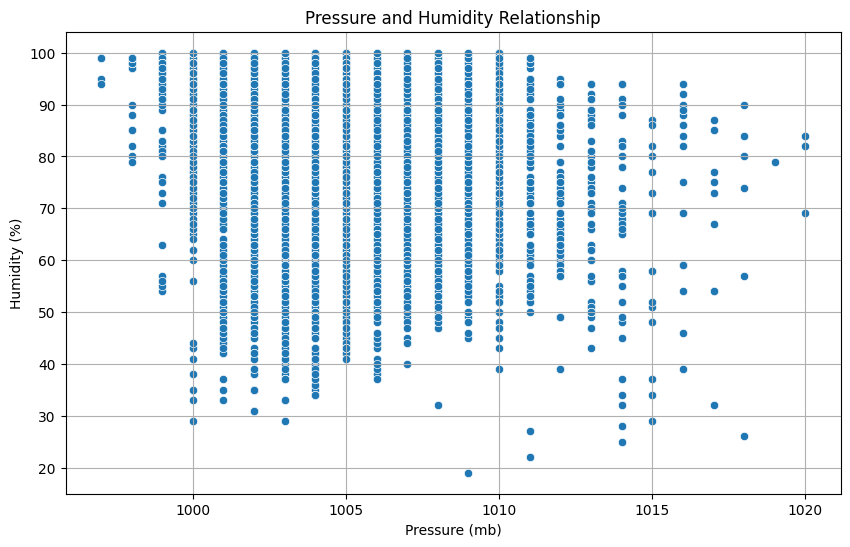

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=weather_df, x='pressure_mb', y='humidity')
plt.title('Pressure and Humidity Relationship')
plt.xlabel('Pressure (mb)')
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()

Correlation between Precipitation and Air Quality

<Figure size 1500x1200 with 0 Axes>

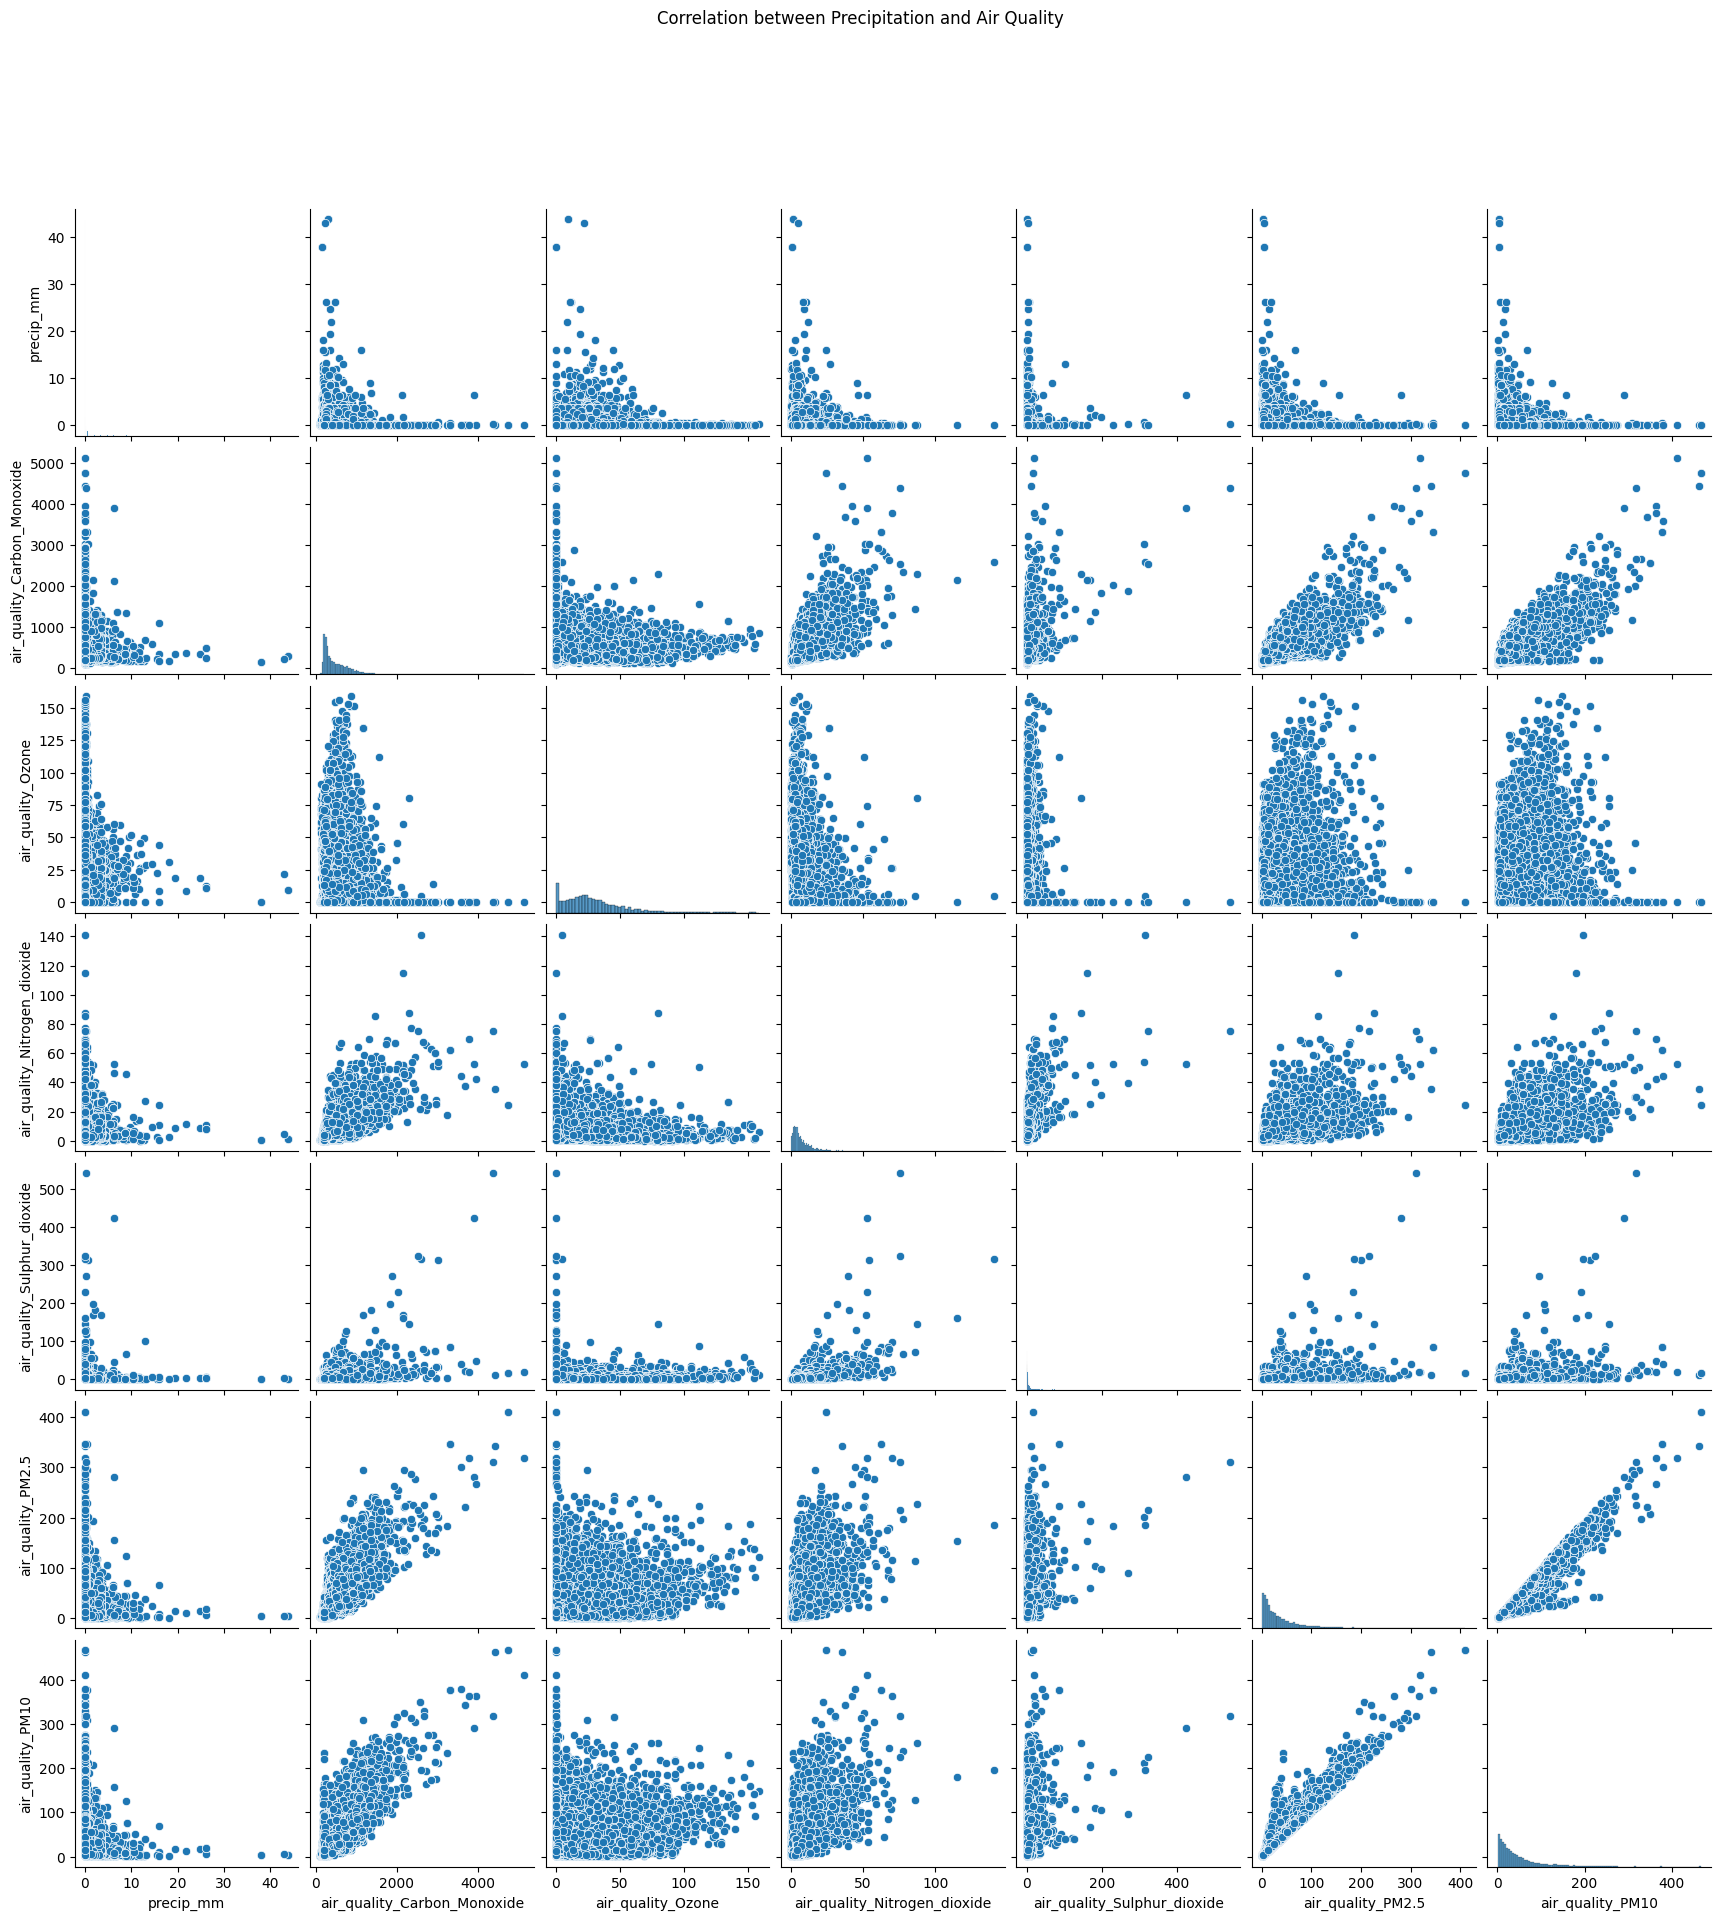

In [33]:
pair_columns = ['precip_mm', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
                'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
                'air_quality_PM2.5', 'air_quality_PM10']
plt.figure(figsize=(15,12))
sns.pairplot(data = weather_df[pair_columns])
plt.suptitle("Correlation between Precipitation and Air Quality", y=1.1)
plt.show()

Wind Direction by Region

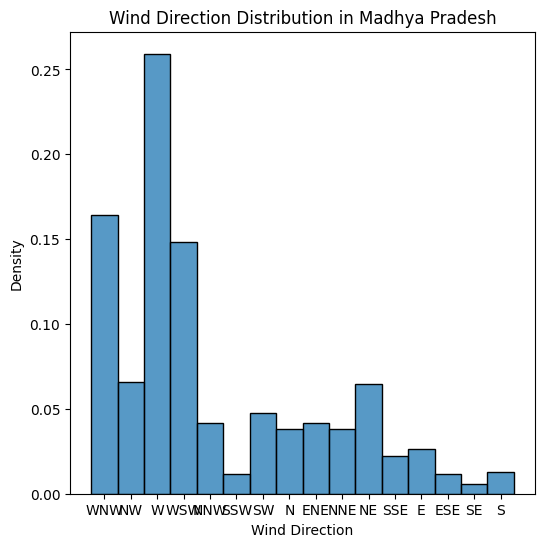

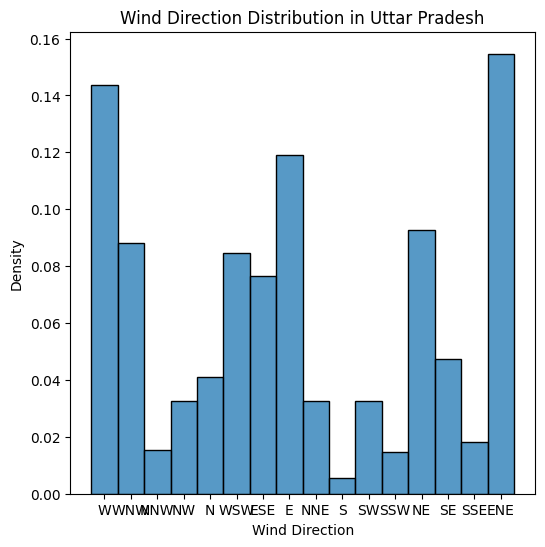

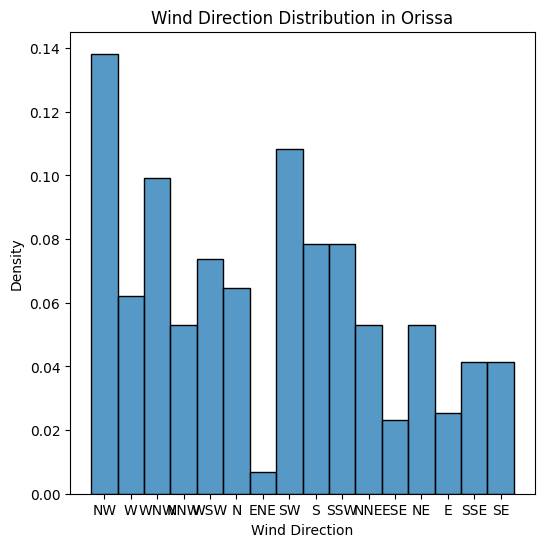

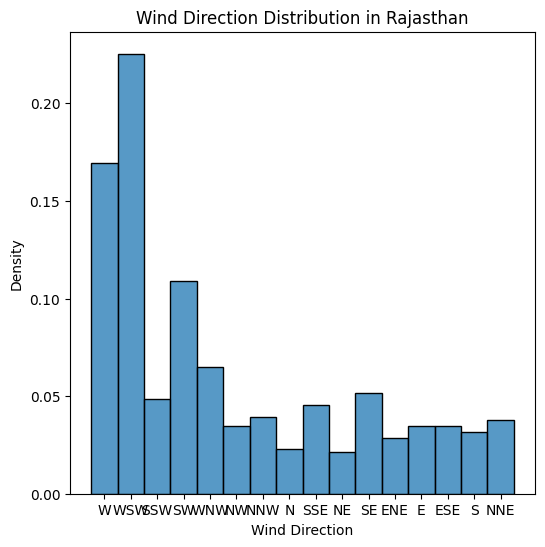

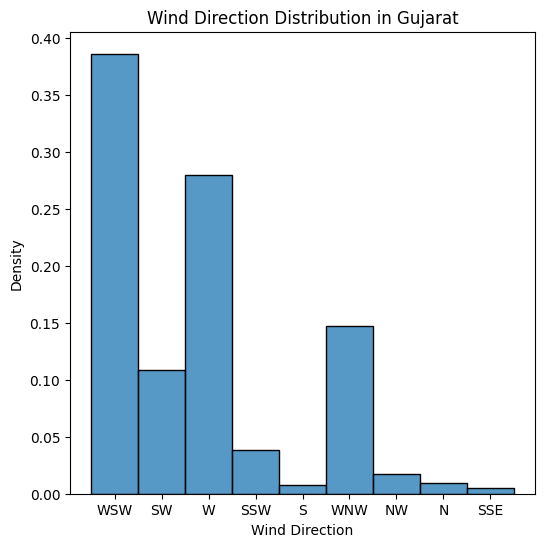

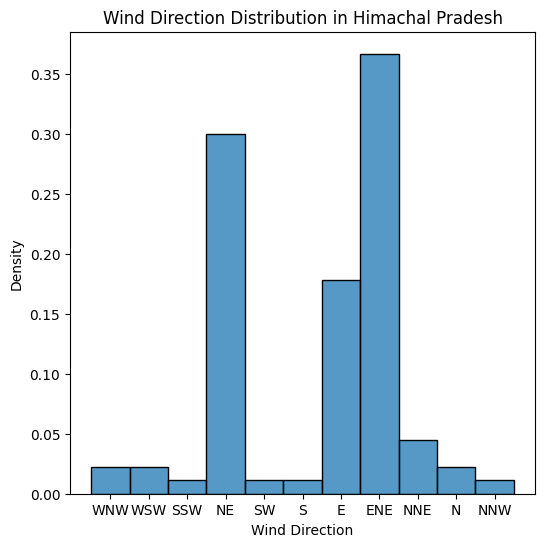

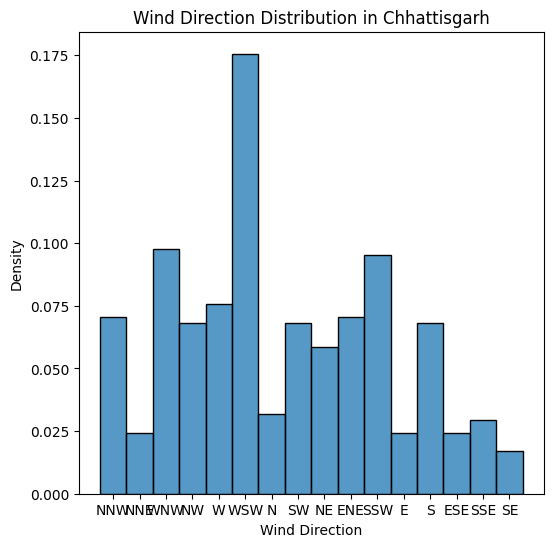

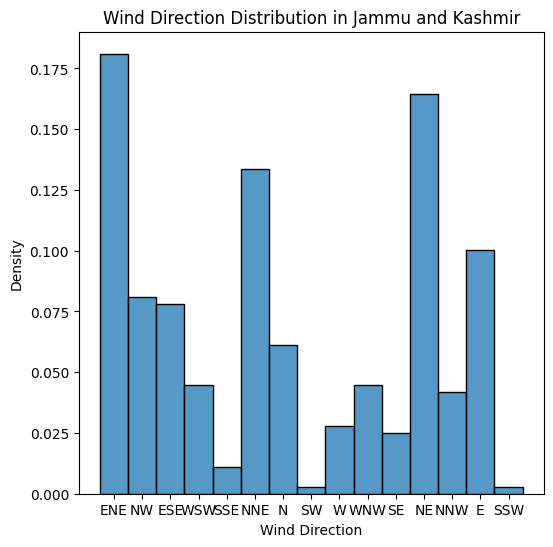

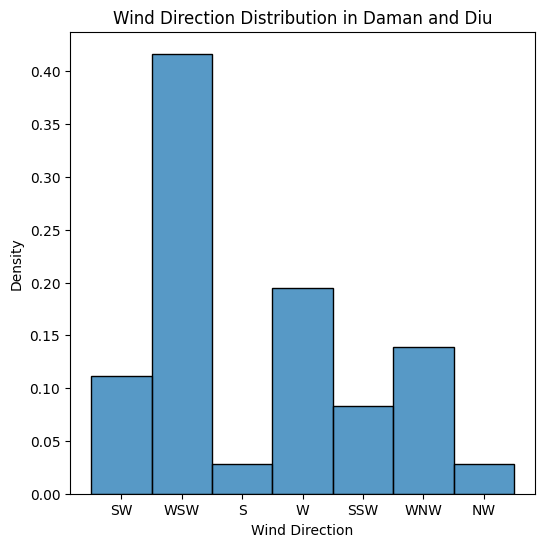

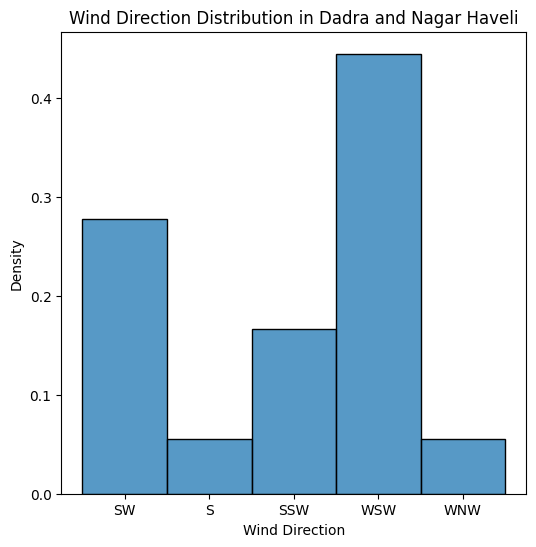

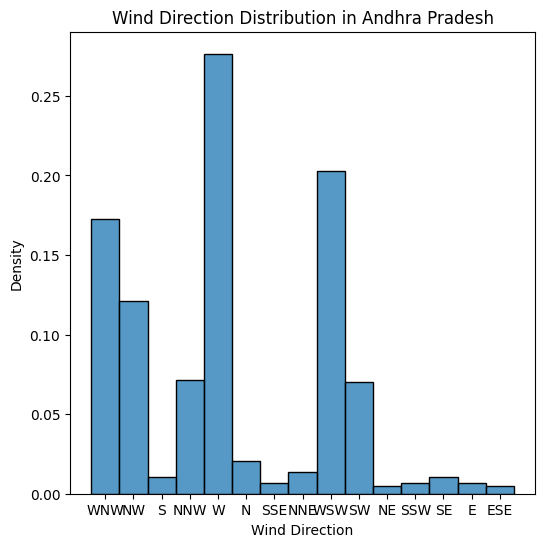

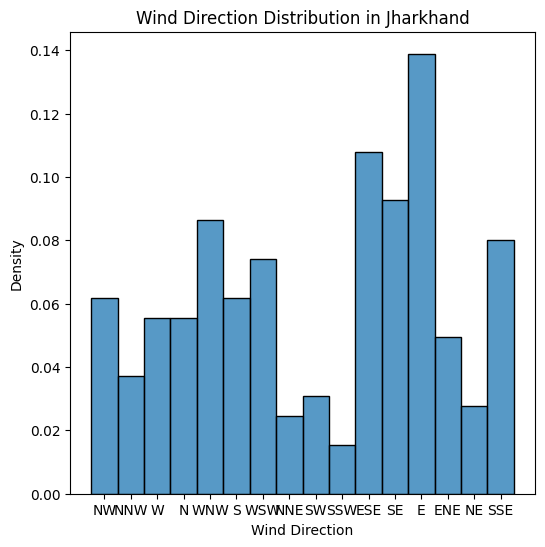

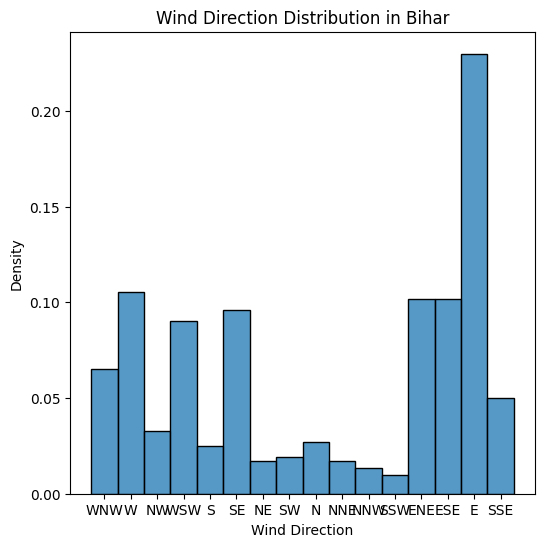

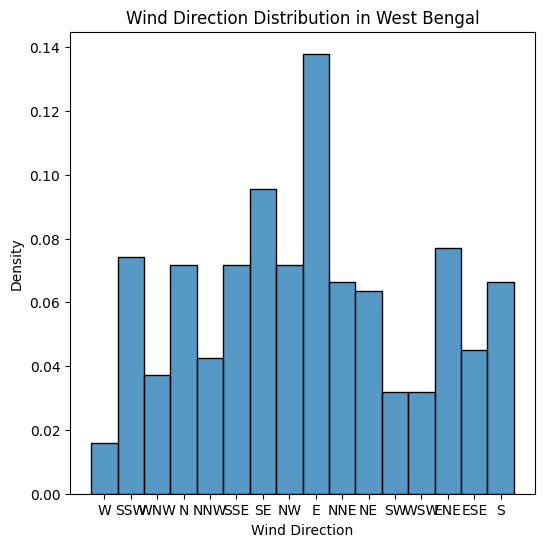

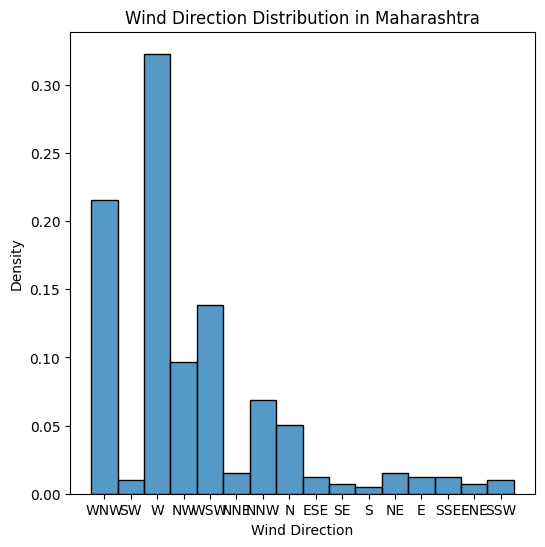

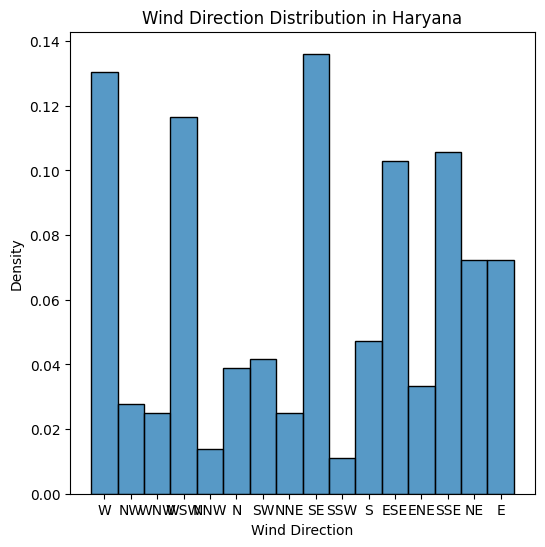

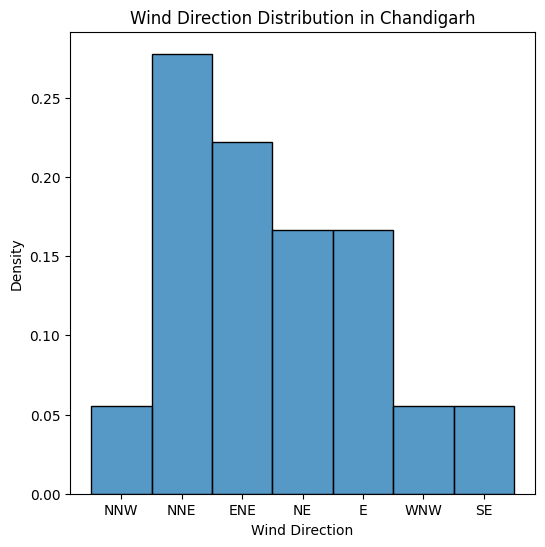

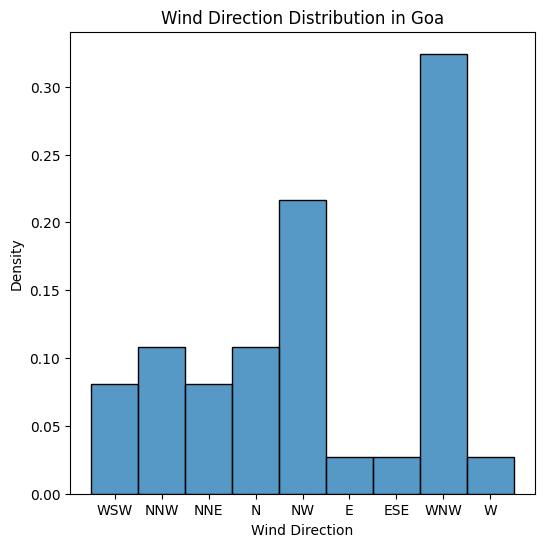

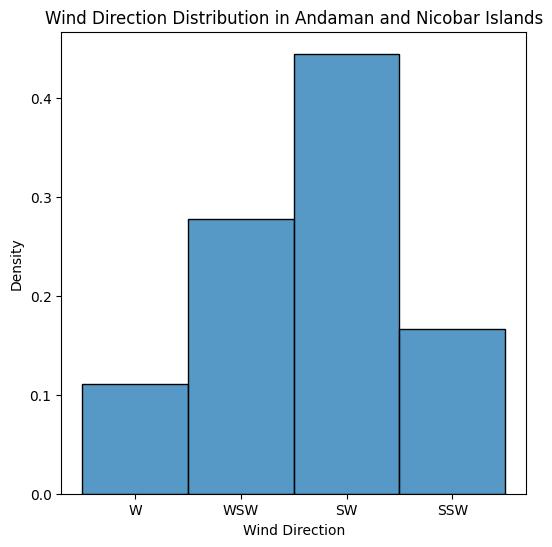

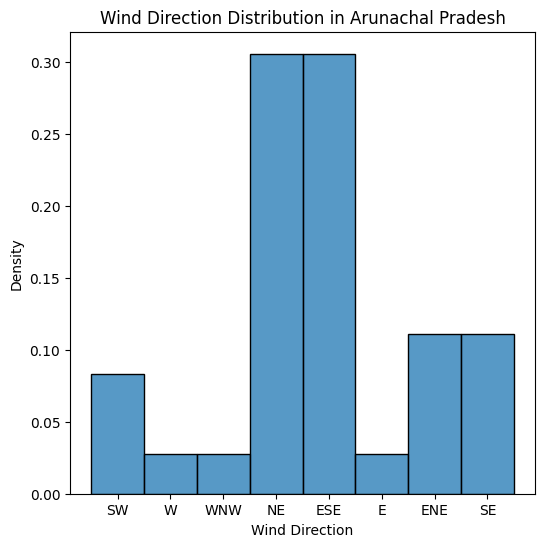

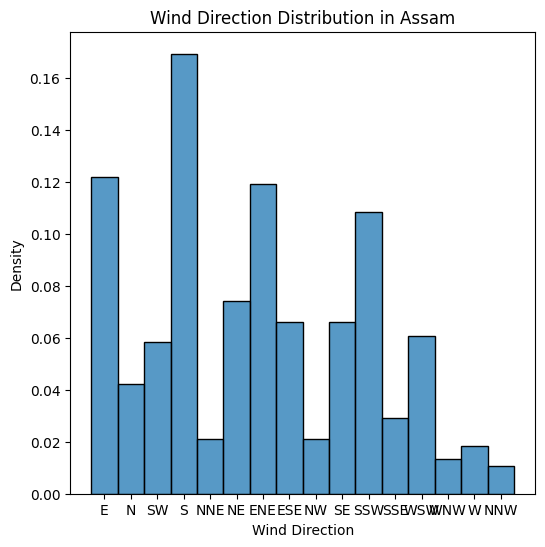

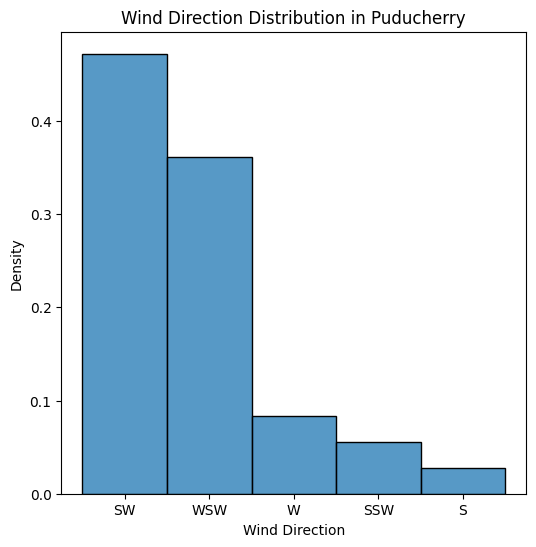

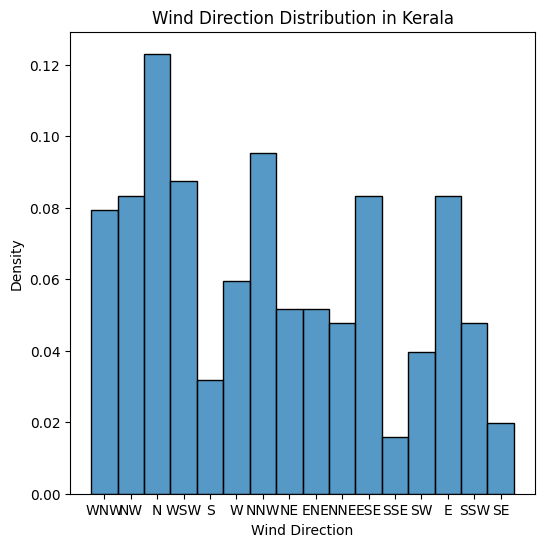

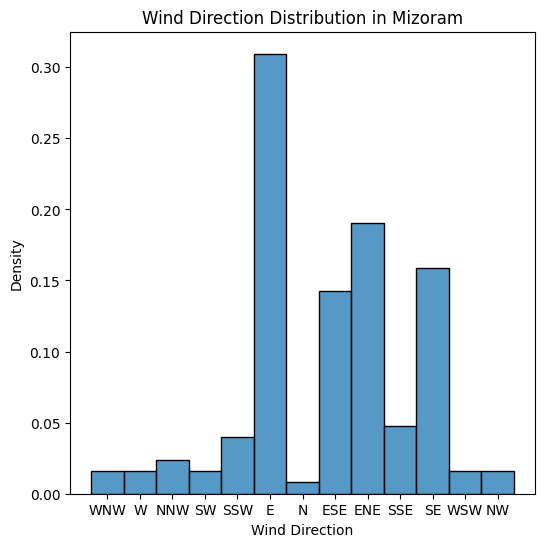

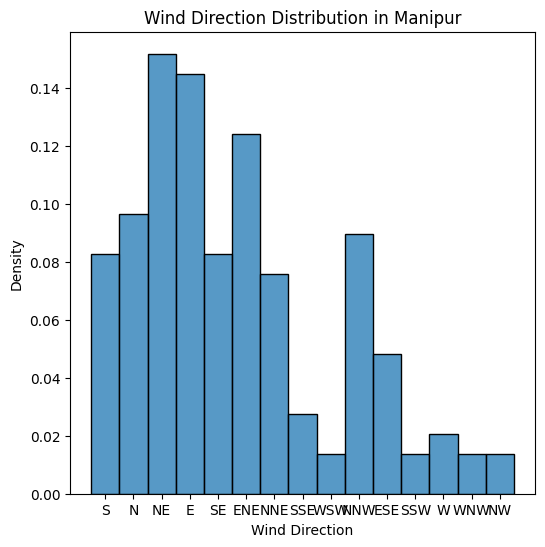

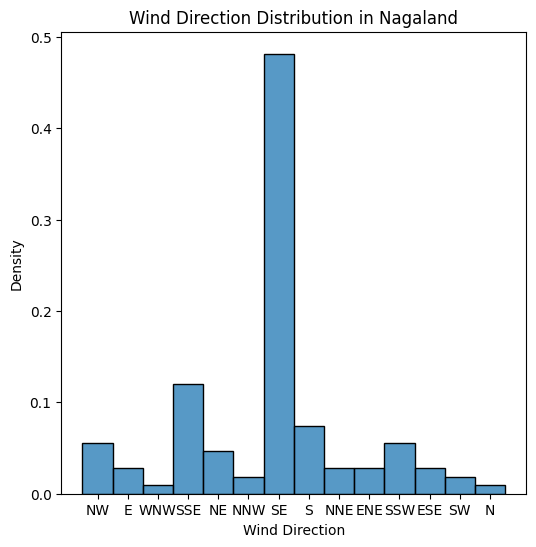

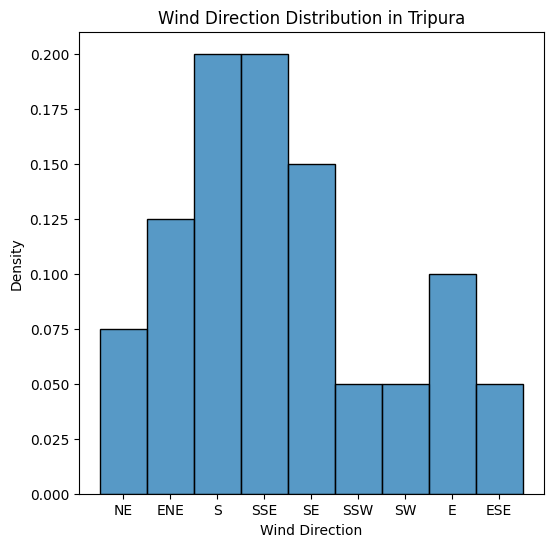

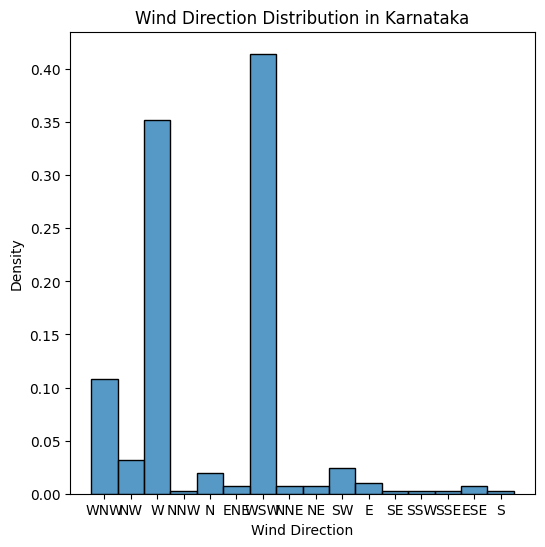

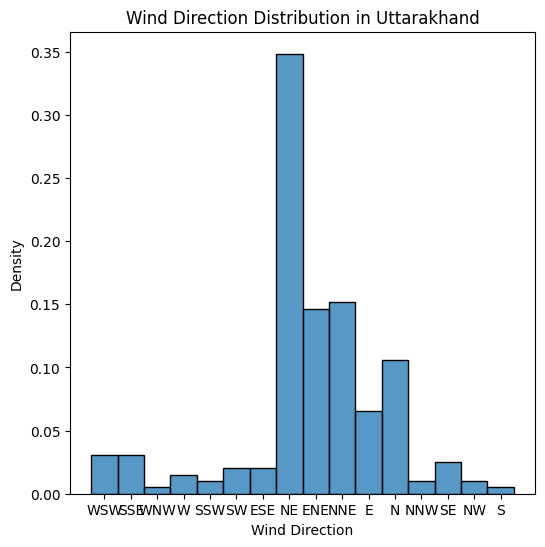

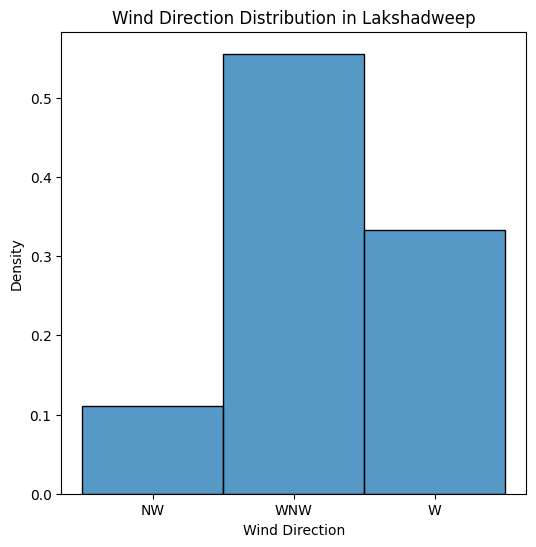

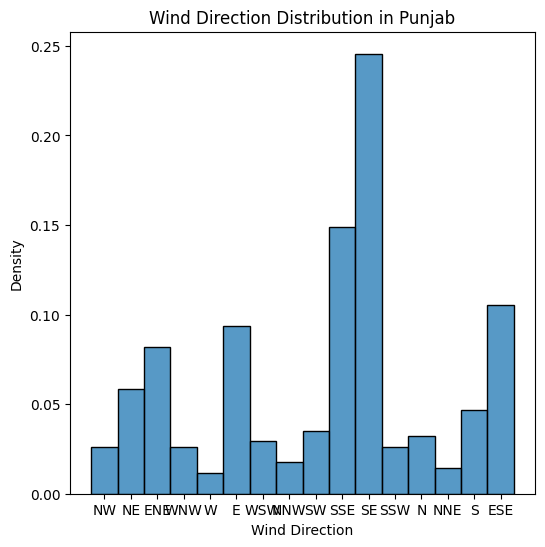

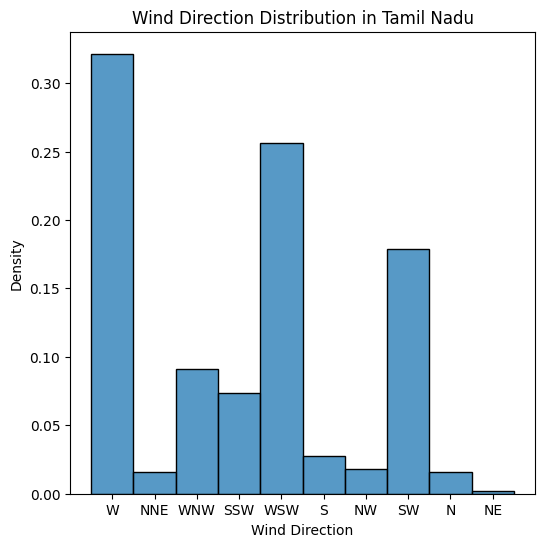

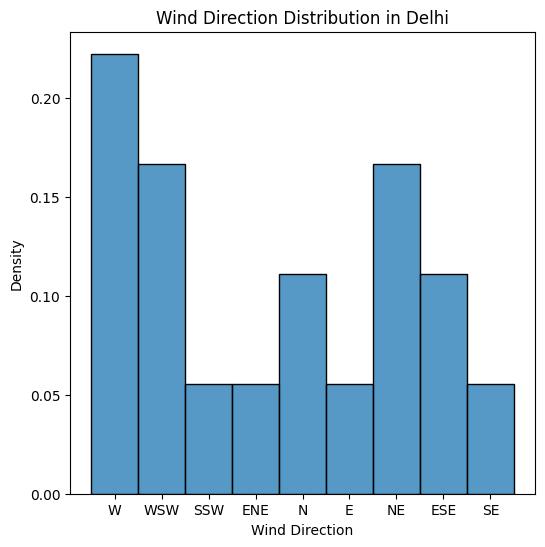

In [42]:
regions = weather_df['region'].unique()

for region in regions:
    plt.figure(figsize=(6, 6))
    data_subset = weather_df[weather_df['region'] == region]
    sns.histplot(data=data_subset, x='wind_direction', bins=16,
                 multiple='stack', stat='density')
    plt.title(f'Wind Direction Distribution in {region}')
    plt.xlabel('Wind Direction')
    plt.ylabel('Density')
    plt.show()

Temperature Variation by Region

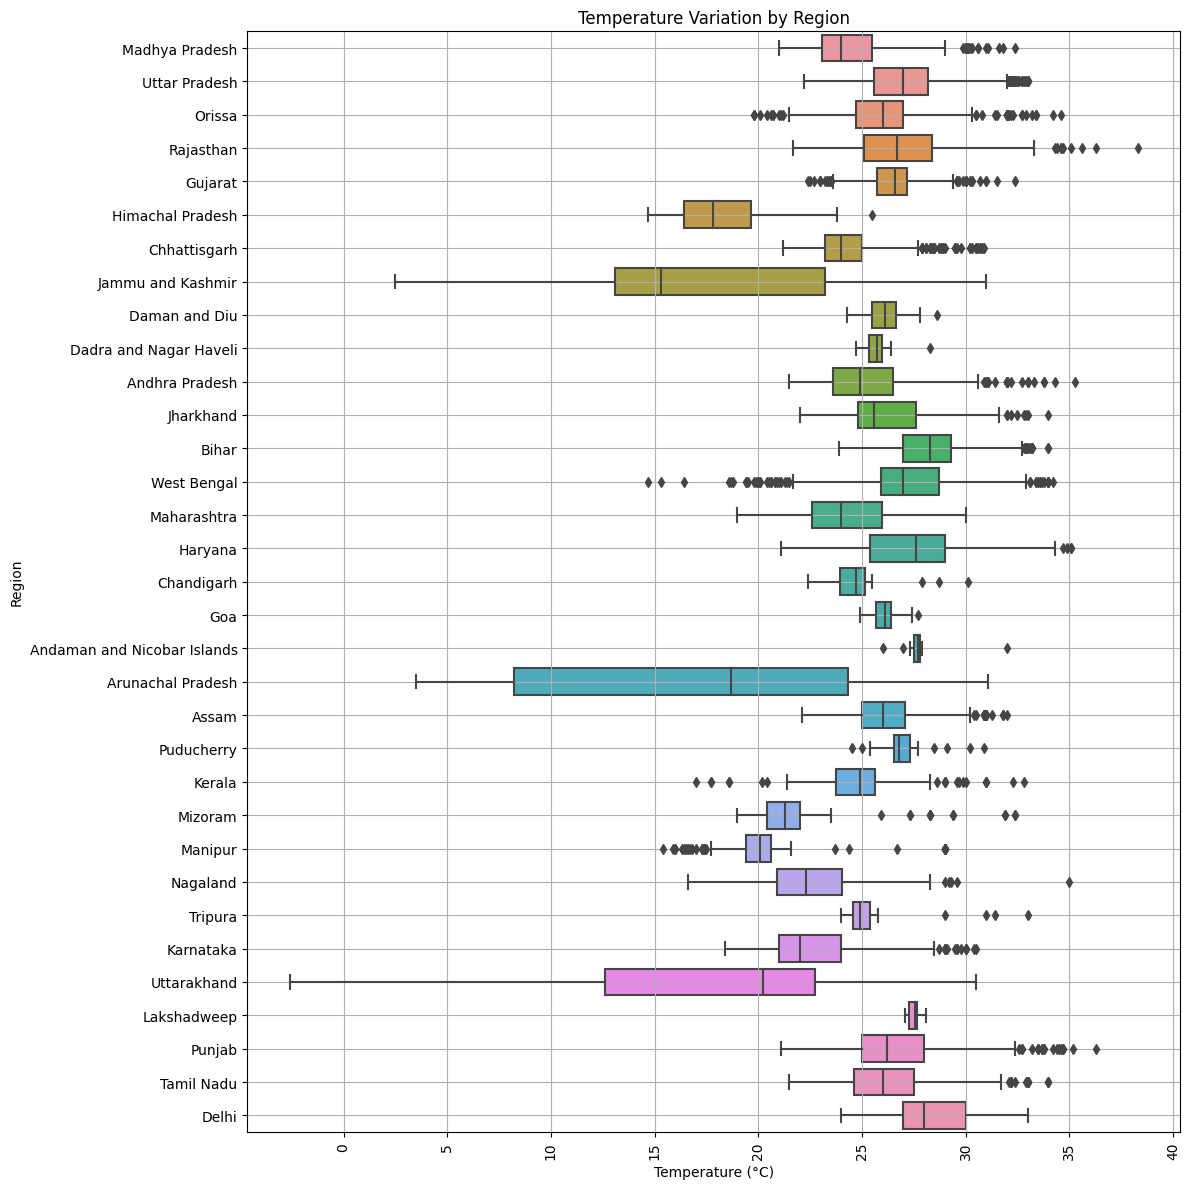

In [43]:
plt.figure(figsize=(12, 12))
sns.boxplot(data=weather_df, x='temperature_celsius', y='region')
plt.title('Temperature Variation by Region')
plt.xlabel('Temperature (°C)')
plt.ylabel('Region')
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

Humidity Comparison Among Regions

In [44]:
fig = px.box(weather_df, x='region', y='humidity',
             title='Humidity Comparison Among Regions',
             labels={'region': 'Region', 'humidity': 'Humidity'})

fig.update_layout(xaxis_title='Region', yaxis_title='Humidity')

fig.show()

Correlation Between UV Index and Temperature by Region

In [45]:
fig = px.scatter(weather_df, x='uv_index', y='temperature_celsius', color='region',
                 title='Correlation Between UV Index and Temperature by Region',
                 labels={'uv_index': 'UV Index', 'temperature_celsius': 'Temperature (Celsius)'})

fig.update_layout(xaxis_title='UV Index', yaxis_title='Temperature (Celsius)')
fig.show()

Cloud Cover Comparison Across Regions

In [46]:
fig = px.box(weather_df, x='region', y='cloud',
             title='Cloud Cover Comparison Across Regions',
             labels={'region': 'Region', 'cloud': 'Cloud Cover'})

fig.update_layout(xaxis_title='Region', yaxis_title='Cloud Cover')

fig.show()

Correlation Matrix

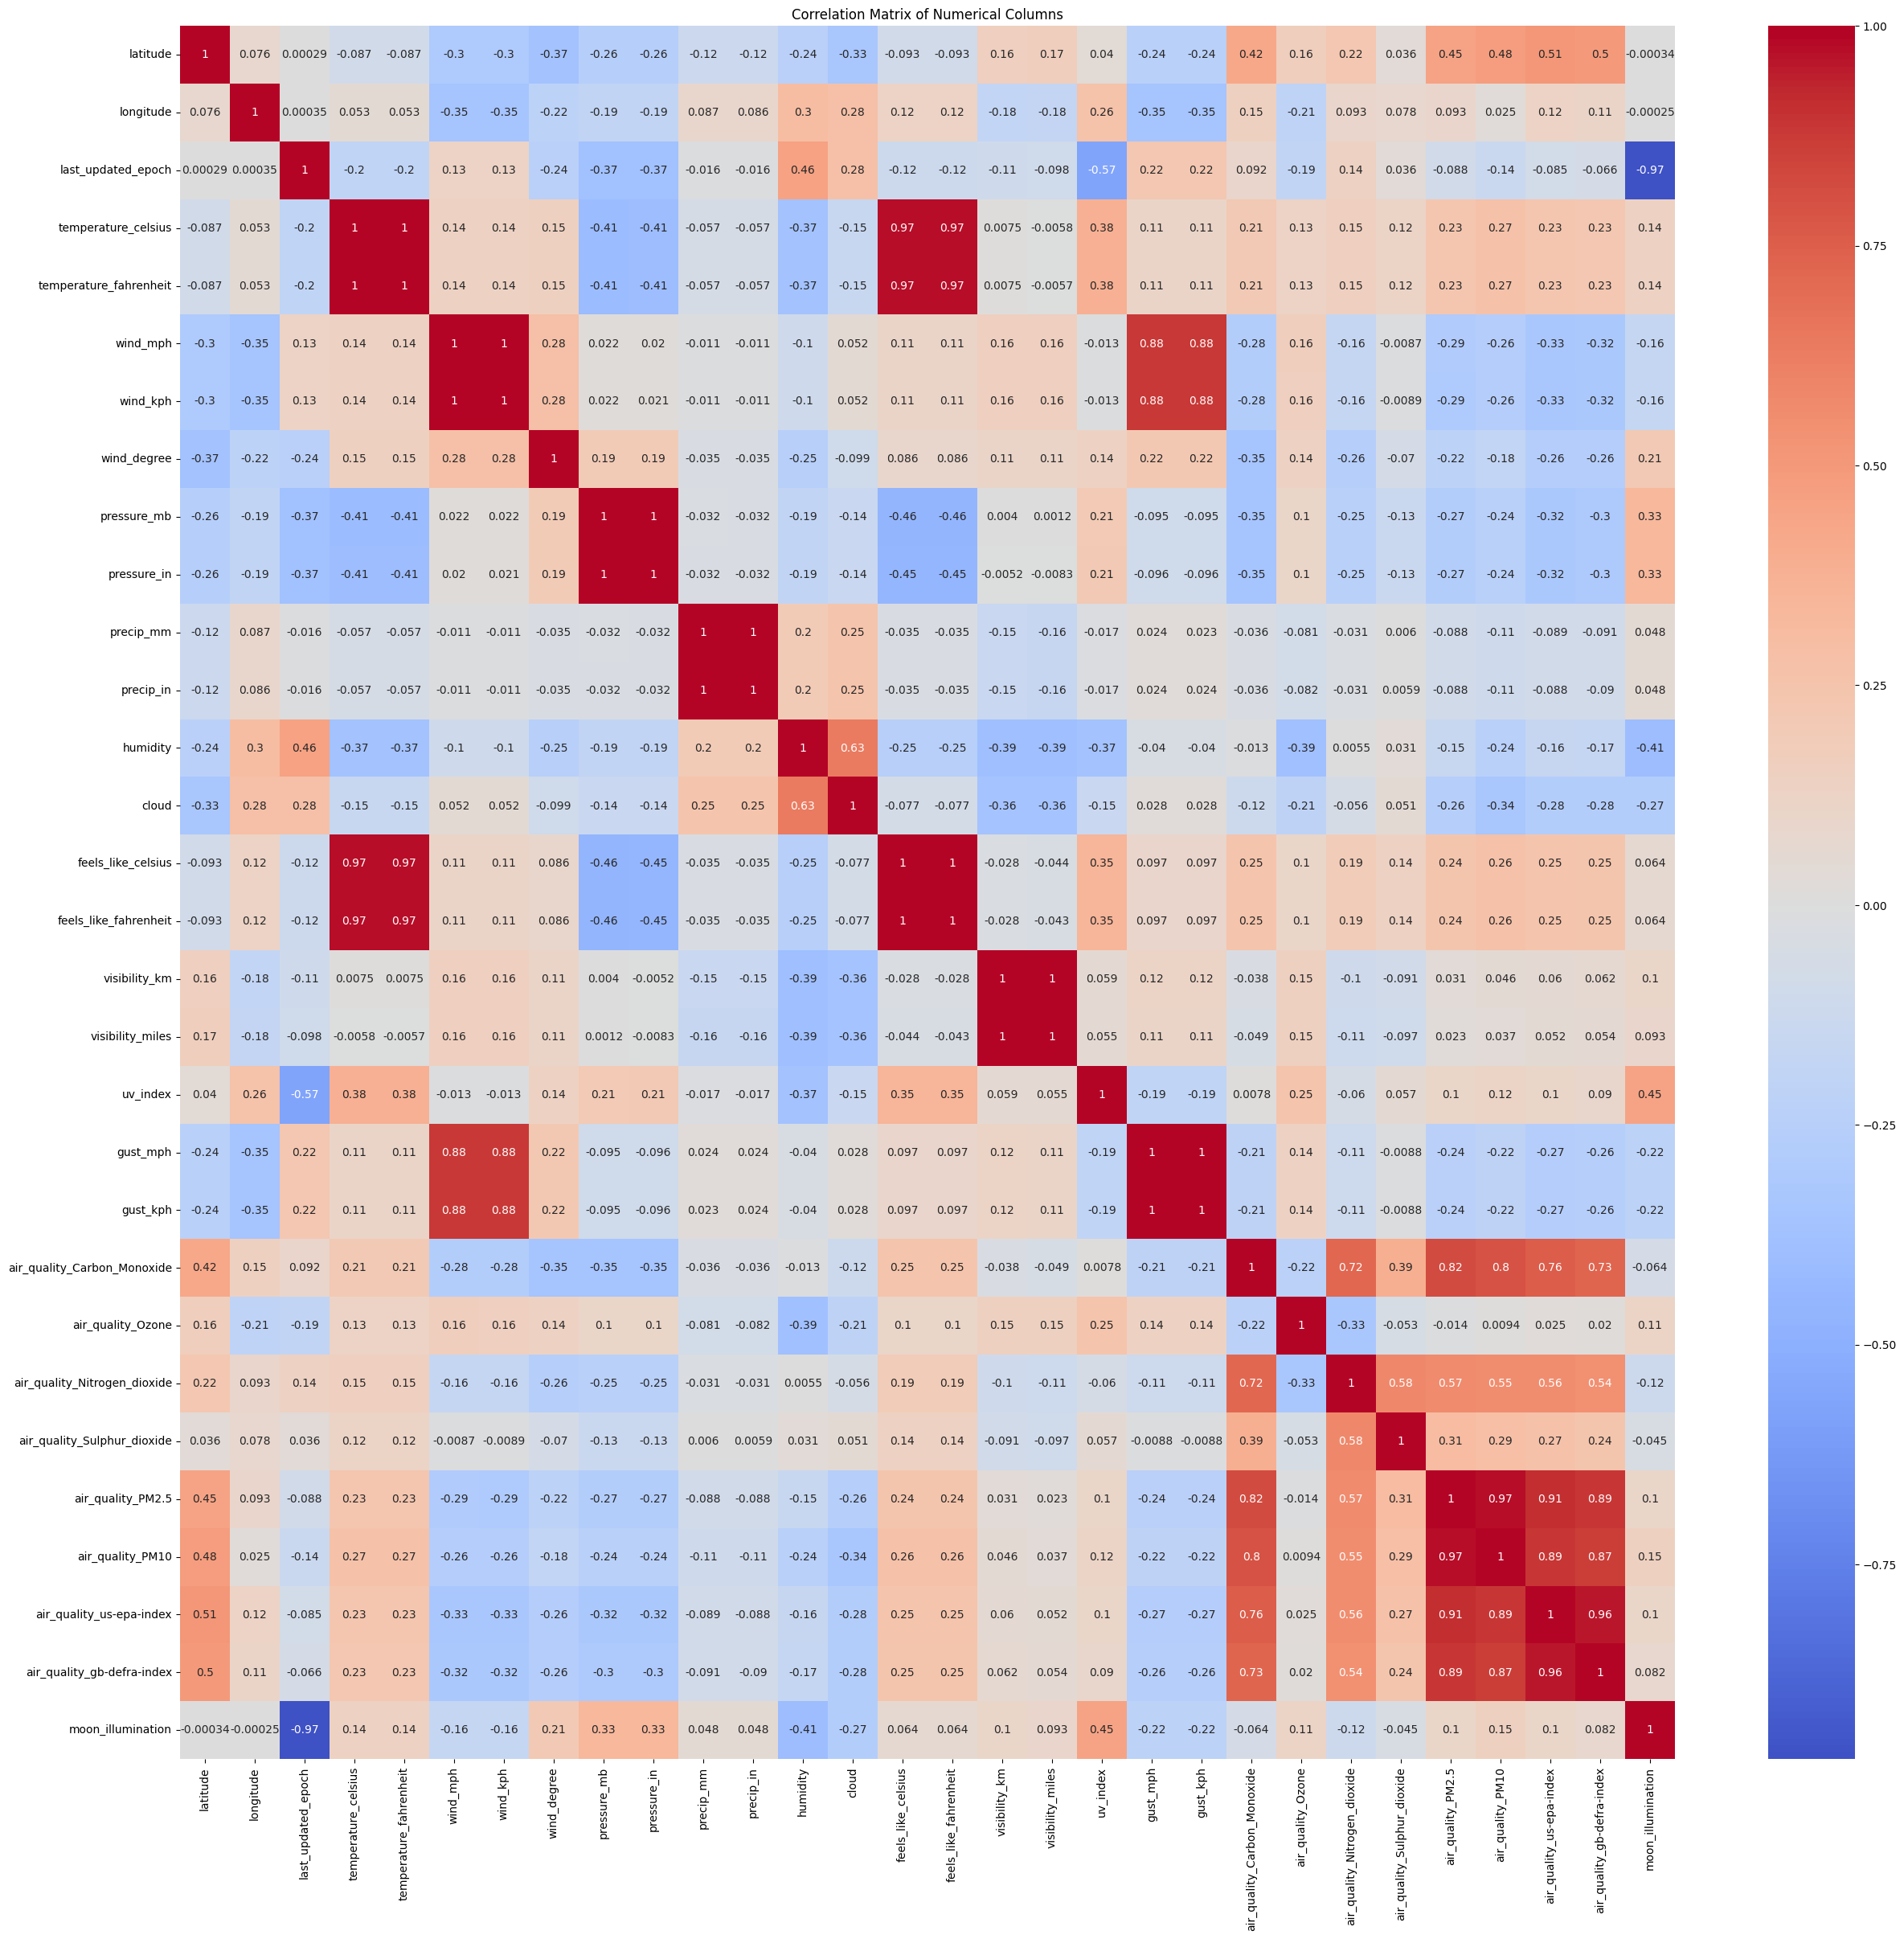

In [48]:
numerical_columns = weather_df.select_dtypes(include=['float64', 'int64']).columns

# Calculating the correlation matrix
correlation_matrix = weather_df[numerical_columns].corr()

plt.figure(figsize=(30, 28))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()